## This is a comparison between LinearSVC, SVC and SGDClassifier classifieres 

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

## Generate linearly separable data and scale it 

Text(0.5, 1.0, 'Iris Dataset: Setosa vs. Versicolor')

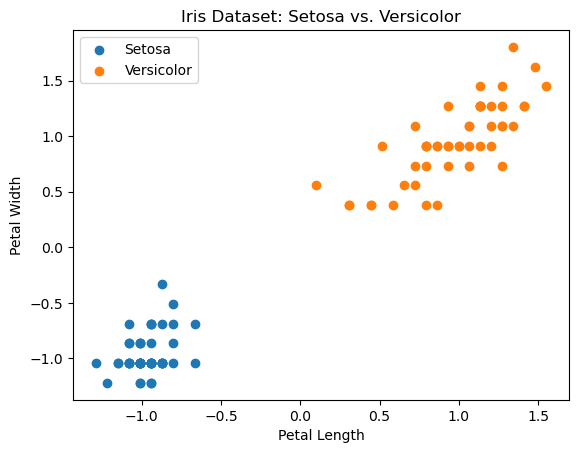

In [105]:


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a scatter plot
plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1], label="Setosa")
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], label="Versicolor")

# Add labels and legend
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Iris Dataset: Setosa vs. Versicolor")

## Train all three models

In [106]:
C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)


lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)



SGDClassifier(alpha=0.002, eta0=0.001, learning_rate='constant',
              random_state=42)

/tmp/ipykernel_13857/1159307088.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_lin, levels=[0], colors='r', linestyles='dashed', label='LinearSVC')
/tmp/ipykernel_13857/1159307088.py:21: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_svm, levels=[0], colors='g', linestyles='dotted', label='SVC')
/tmp/ipykernel_13857/1159307088.py:22: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_sgd, levels=[0], colors='b', linestyles='dashdot', label='SGDClassifier')


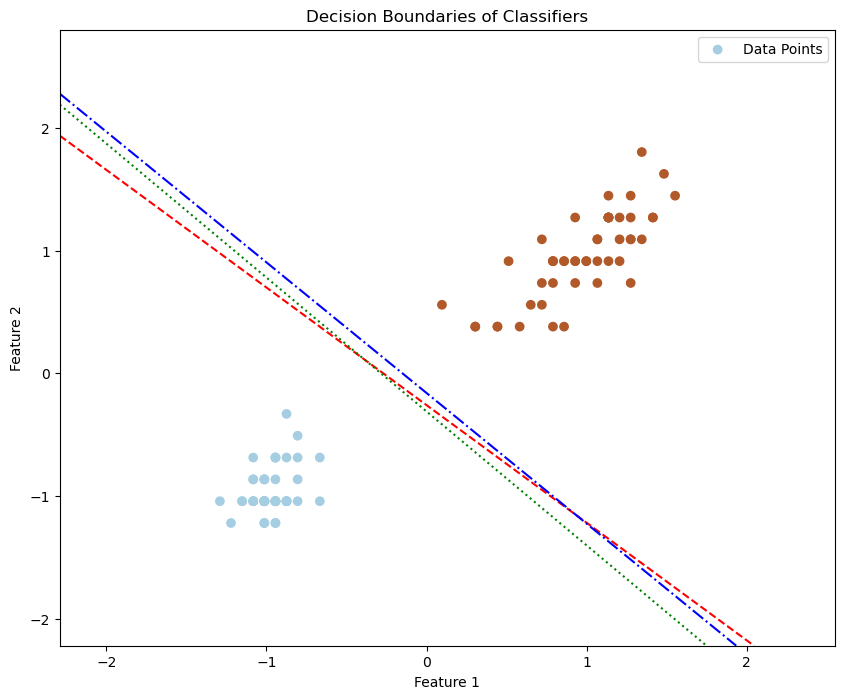

In [109]:

# Create a mesh grid
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Plot decision boundaries for all three classifiers
Z_lin = lin_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_lin = Z_lin.reshape(xx.shape)

Z_svm = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

Z_sgd = sgd_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_sgd = Z_sgd.reshape(xx.shape)

plt.figure(figsize=(10, 8))

# Plot the decision boundaries as dashed lines
plt.contour(xx, yy, Z_lin, levels=[0], colors='r', linestyles='dashed', label='LinearSVC')
plt.contour(xx, yy, Z_svm, levels=[0], colors='g', linestyles='dotted', label='SVC')
plt.contour(xx, yy, Z_sgd, levels=[0], colors='b', linestyles='dashdot', label='SGDClassifier')

# Scatter plot of data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, label='Data Points')

plt.title("Decision Boundaries of Classifiers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## They are pretty close 